In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

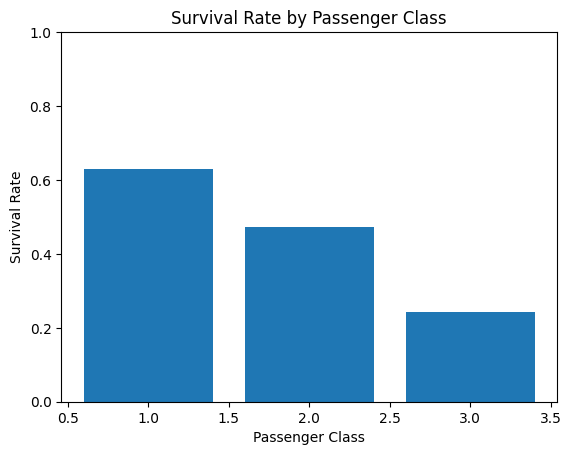

In [10]:
#Handle missing Pclass
df_clean = df.dropna(subset=['Pclass'])

#Compute survival rates (not counts)
survival_rates = (
    df_clean
    .groupby('Pclass')['Survived']
    .mean()
)

plt.bar(survival_rates.index, survival_rates.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 1)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9568\230630018.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


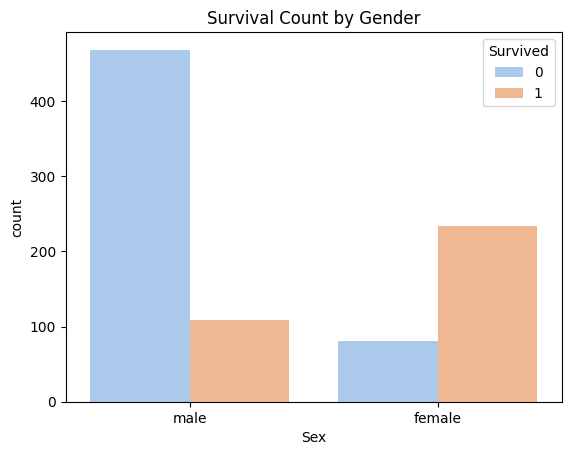

In [11]:
#Gender Survival – Seaborn Countplot

sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    order=['male', 'female'],
    palette=sns.color_palette("pastel")
)
plt.title('Survival Count by Gender')
plt.show()

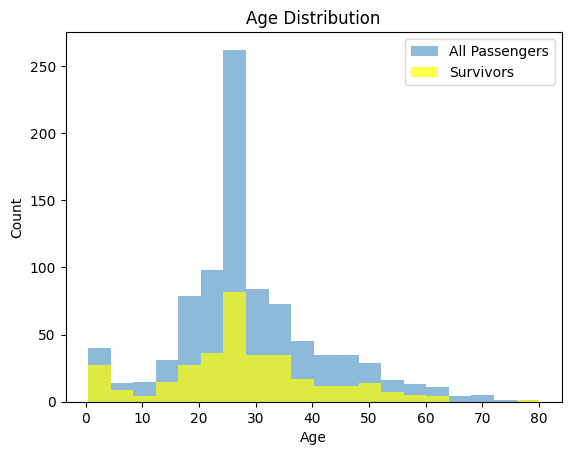

In [14]:
#Age Distribution – Histogram (Matplotlib)

#Handle missing Age
df['Age'] = df['Age'].fillna(df['Age'].median())

plt.hist(df['Age'], bins=20, alpha=0.5, label='All Passengers')

plt.hist(
    df[df['Survived'] == 1]['Age'],
    bins=20,
    alpha=0.7,
    color='yellow',
    label='Survivors'
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution')
plt.show()

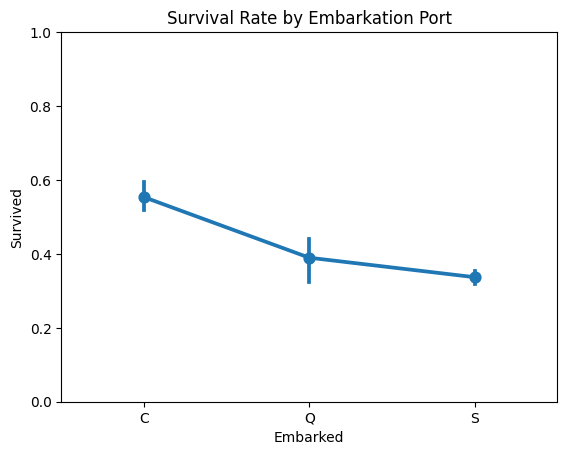

In [17]:
#Embarkation Port – Seaborn Pointplot

#Handle missing Embarked

df_emb = df.dropna(subset=['Embarked'])

sns.pointplot(
    x='Embarked',
    y='Survived',
    data=df_emb,
    errorbar=('ci', 68),
    order=['C', 'Q', 'S']
)
plt.title('Survival Rate by Embarkation Port')
plt.ylim(0, 1)
plt.show()

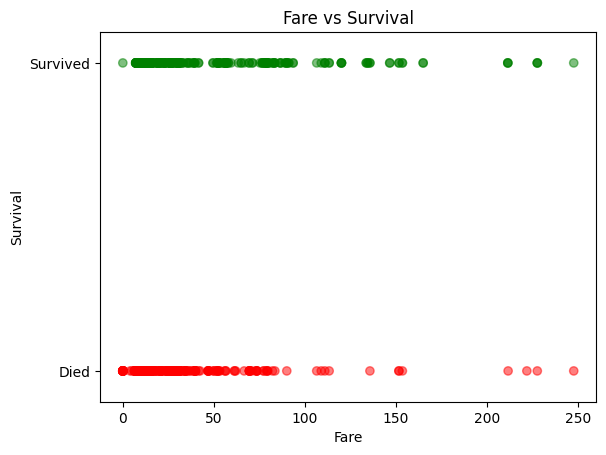

In [19]:
#Fare vs Survival – Scatter Plot (Matplotlib)
#Handle outliers
df_fare = df[df['Fare'] < df['Fare'].quantile(0.99)]

#Scatter plot with explicit color mapping
colors = df_fare['Survived'].map({0: 'red', 1: 'green'})

plt.scatter(df_fare['Fare'], df_fare['Survived'], c=colors, alpha=0.5)
plt.yticks([0, 1], ['Died', 'Survived'])
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.title('Fare vs Survival')
plt.ylim(-0.1, 1.1)
plt.show()

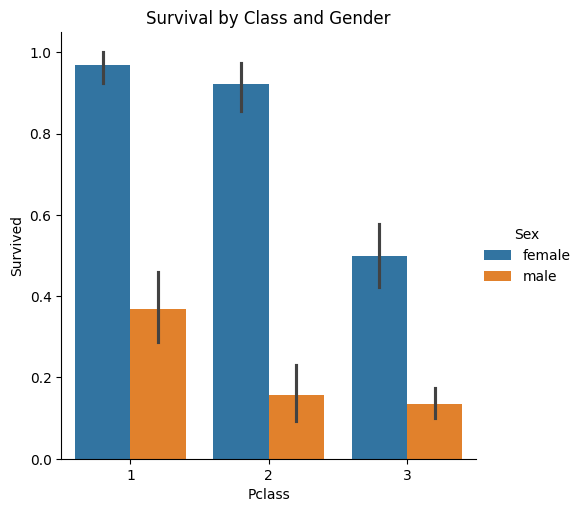

In [20]:
#Cabin Class – Seaborn Catplot (Bar)
sns.catplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    kind='bar',
    data=df
)
plt.title('Survival by Class and Gender')
plt.show()

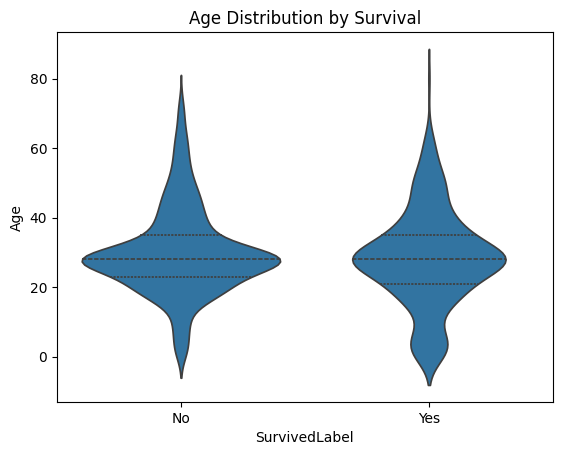

In [21]:
#Age vs Survival – Violin Plot
#Convert Survived to categorical

df['SurvivedLabel'] = df['Survived'].map({0: 'No', 1: 'Yes'})

#Violin plot
sns.violinplot(
    x='SurvivedLabel',
    y='Age',
    data=df,
    inner='quartiles'
)
plt.title('Age Distribution by Survival')
plt.show()

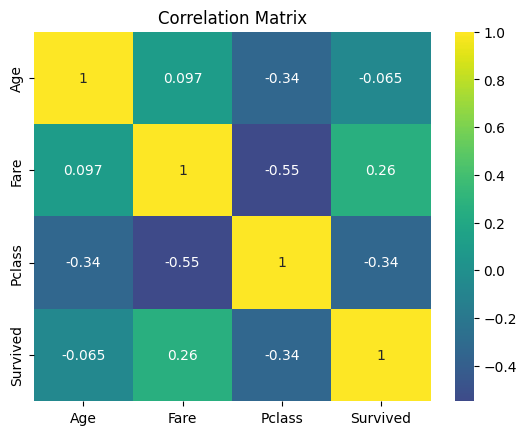

In [22]:
#Correlation Matrix – Heatmap
corr = df[['Age', 'Fare', 'Pclass', 'Survived']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    center=0
)
plt.title('Correlation Matrix')
plt.show()

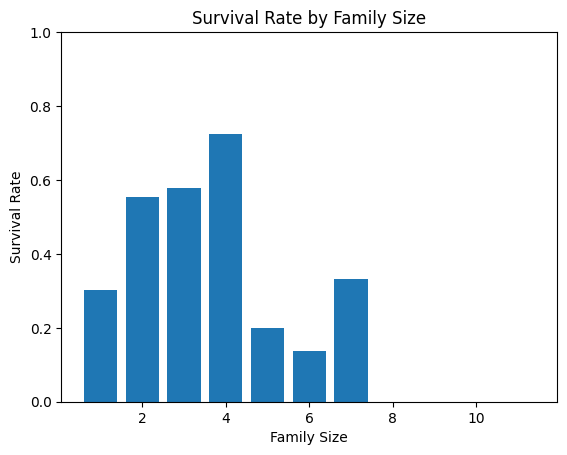

In [25]:
#Survival by Family Size – Corrected Grouped Bar
#Create FamilySize

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Compute survival rate
family_survival = (
    df.groupby('FamilySize')['Survived']
    .mean()
)

plt.bar(family_survival.index, family_survival.values)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.ylim(0, 1)
plt.show()